In [20]:
import sys
sys.path.append("../")

import pandas as pd
import os
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn-darkgrid')


from library import regulations
from library import analysis
from library import tables
from library import graphs

In [21]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 'yr1415']
data = data[data.eligible == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# STAAR

In [22]:
data['bins_avescores']  = pd.qcut(data['avescores'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_avescores'])[['doi', 'avescores']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['doi'])
p_doi['se'] = p_doi['sd']['doi']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_avescores       ave                  sd              n            \
                          doi avescores       doi avescores  doi avescores   
0  (-1.398, -0.493]  0.649485 -0.800067  0.478366  0.223912  194       194   
1  (-0.493, -0.112]  0.773196 -0.306940  0.419848  0.114212  194       194   
2   (-0.112, 0.233]  0.819588  0.064685  0.385525  0.104811  194       194   
3    (0.233, 0.595]  0.819588  0.415640  0.385525  0.108471  194       194   
4    (0.595, 3.188]  0.860825  1.097926  0.347025  0.457184  194       194   

         se        ci  
                       
0  0.034345  0.068689  
1  0.030143  0.060287  
2  0.027679  0.055358  
3  0.027679  0.055358  
4  0.024915  0.049830

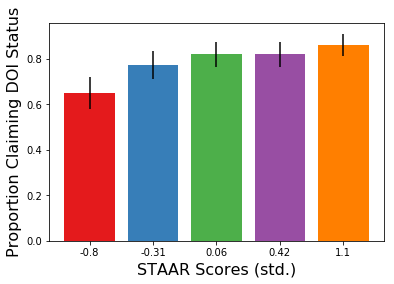

In [23]:
palette = plt.get_cmap('Set1')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['doi'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['avescores']).round(2))

plt.ylabel('Proportion Claiming DOI Status', fontsize = 16)
plt.xlabel('STAAR Scores (std.)', fontsize = 16)

plt.savefig(table_path + 'bar_test_doi.png', dpi = 600)


# Hispanic

In [45]:
data['bins_hisp']  = pd.qcut(data['students_hisp'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_hisp'])[['doi', 'students_hisp']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['doi'])
p_doi['se'] = p_doi['sd']['doi']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_hisp       ave                      sd                  n  \
                          doi students_hisp       doi students_hisp  doi   
0  (0.00163, 0.139]  0.856410      0.086927  0.351576      0.031576  195   
1    (0.139, 0.242]  0.845361      0.187501  0.362496      0.031416  194   
2    (0.242, 0.401]  0.820513      0.318098  0.384748      0.046519  195   
3    (0.401, 0.614]  0.809278      0.500292  0.393887      0.060618  194   
4    (0.614, 0.999]  0.584615      0.817631  0.494057      0.127635  195   

                       se        ci  
  students_hisp                      
0           195  0.025177  0.050354  
1           194  0.026026  0.052051  
2           195  0.027552  0.055105  
3           194  0.028279  0.056559  
4           195  0.035380  0.070760

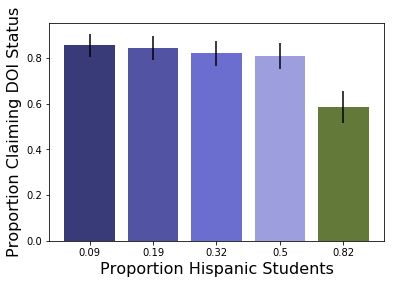

In [46]:
palette = plt.get_cmap('tab20b')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['doi'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['students_hisp']).round(2))

plt.ylabel('Proportion Claiming DOI Status', fontsize = 16)
plt.xlabel('Proportion Hispanic Students', fontsize = 16)

plt.savefig(table_path + 'bar_hisp_doi.png', dpi = 600)


# Black

In [36]:
data['bins_black']  = pd.qcut(data['students_black'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_black'])[['doi', 'students_black']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['doi'])
p_doi['se'] = p_doi['sd']['doi']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_black       ave                       sd                   n  \
                           doi students_black       doi students_black  doi   
0  (-0.001, 0.00409]  0.630769       0.001046  0.483839       0.001372  195   
1  (0.00409, 0.0132]  0.824742       0.008156  0.381171       0.002631  194   
2   (0.0132, 0.0389]  0.789744       0.023905  0.408540       0.007112  195   
3    (0.0389, 0.111]  0.845361       0.070086  0.362496       0.020715  194   
4     (0.111, 0.776]  0.825641       0.218403  0.380394       0.119165  195   

                        se        ci  
  students_black                      
0            195  0.034648  0.069297  
1            194  0.027366  0.054733  
2            195  0.029256  0.058512  
3            194  0.026026  0.052051  
4            195  0.027241  0.054481

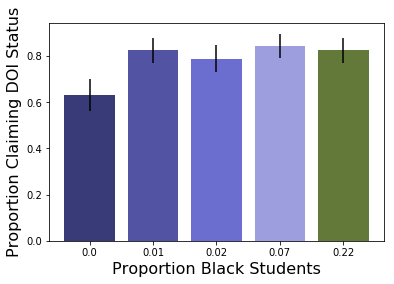

In [43]:
palette = plt.get_cmap('tab20b')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['doi'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['students_black']).round(2))

plt.ylabel('Proportion Claiming DOI Status', fontsize = 16)
plt.xlabel('Proportion Black Students', fontsize = 16)

plt.savefig(table_path + 'bar_black_doi.png', dpi = 600)


# FRPL

In [28]:
data['bins_frpl']  = pd.qcut(data['students_frpl'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_frpl'])[['doi', 'students_frpl']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['doi'])
p_doi['se'] = p_doi['sd']['doi']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_frpl       ave                      sd                  n  \
                         doi students_frpl       doi students_frpl  doi   
0  (-0.001, 0.404]  0.830769      0.287079  0.375921      0.098914  195   
1   (0.404, 0.516]  0.865979      0.465981  0.341556      0.031276  194   
2   (0.516, 0.612]  0.830769      0.564315  0.375921      0.028325  195   
3   (0.612, 0.723]  0.742268      0.664806  0.438517      0.033275  194   
4     (0.723, 1.0]  0.646154      0.810755  0.479393      0.067745  195   

                       se        ci  
  students_frpl                      
0           195  0.026920  0.053840  
1           194  0.024522  0.049045  
2           195  0.026920  0.053840  
3           194  0.031484  0.062967  
4           195  0.034330  0.068660

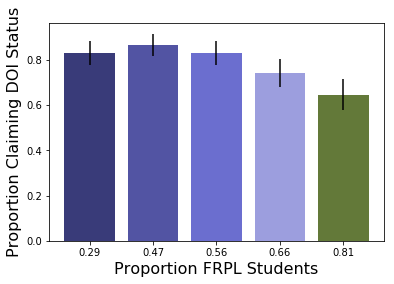

In [29]:
palette = plt.get_cmap('tab20b')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['doi'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['students_frpl']).round(2))

plt.ylabel('Proportion Claiming DOI Status', fontsize = 16)
plt.xlabel('Proportion FRPL Students', fontsize = 16)

plt.savefig(table_path + 'bar_frpl_doi.png', dpi = 600)


# Student-Teacher Ratio

In [30]:
data['bins_stuteach']  = pd.qcut(data['students_teacher_ratio'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_stuteach'])[['doi', 'students_teacher_ratio']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['doi'])
p_doi['se'] = p_doi['sd']['doi']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_stuteach       ave                               sd  \
                                     doi students_teacher_ratio       doi   
0  (2.4210000000000003, 5.621]  0.733333               4.936629  0.443355   
1               (5.621, 6.329]  0.768041               6.004045  0.423175   
2               (6.329, 6.932]  0.753846               6.636106  0.431878   
3               (6.932, 7.671]  0.845361               7.287227  0.362496   
4              (7.671, 10.399]  0.815385               8.328023  0.388984   

                            n                               se        ci  
  students_teacher_ratio  doi students_teacher_ratio                      
0               0.674975  195                    195  0.031749  0.063499  
1               0.203832  194                    194  0.030382  0.060764  
2               0.172356  195                    195  0.030927  0.061855  
3               0.217246  194                    194  0.026026  0.052051  
4               0.544823  195                    195  0.027856  0.055711

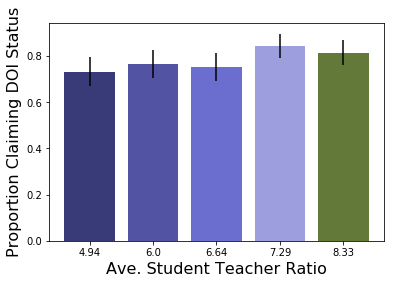

In [31]:
palette = plt.get_cmap('tab20b')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['doi'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['students_teacher_ratio']).round(2))

plt.ylabel('Proportion Claiming DOI Status', fontsize = 16)
plt.xlabel('Ave. Student Teacher Ratio', fontsize = 16)

plt.savefig(table_path + 'bar_stuteach_doi.png', dpi = 600)
